<a href="https://colab.research.google.com/github/kaitlinblakeslee/assignment3/blob/main/Copy_of_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

# New Section

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

fatal: destination path 'knn' already exists and is not an empty directory.
   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
(1000, 5)
['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased']
User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object
   Age  AnnualSalary
0   35         20000
1   40         43500
2   49         74000
3   40        107500
4   25         79000 

               Age   AnnualSalary
count  1000.000000    1000.000000
mean     40.106000   72689.000000
std      10.707073   34488.341867
min      18.000000   15000.000000
25%      32.000000   46375.000000
50%      40.000000   72000.000000
75%      48.000000   90000.000000
max      63.000000  152500.000000 

   

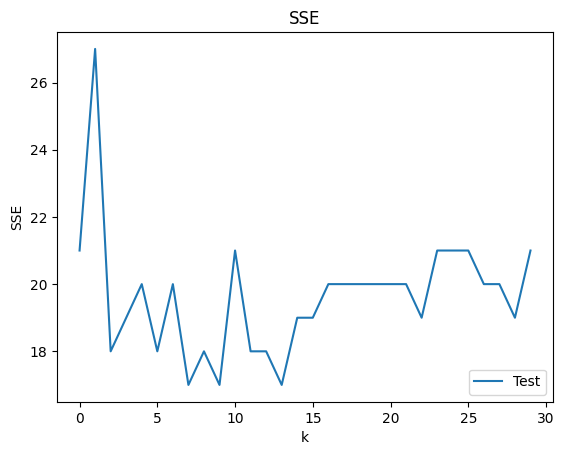

col_0,0,1
Purchased,,
0,45,7
1,15,28


In [ ]:
! git clone https://www.github.com/DS3001/knn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def pn(x):
  print(x,'\n')
  return


cdf = pd.read_csv('./knn/data/car_data.csv')
print(cdf.head()) #look at head
print(cdf.shape) #look at dimensions
print(cdf.columns.tolist()) #summarize variables
print(cdf.dtypes) #summarize variable datatypes
#checking for missing data for each variable - doesn't appear to be any
#print(cdf['User ID'].unique(),'\n')
#print(cdf['Gender'].unique(),'\n')
#print(cdf['Age'].unique(),'\n')
#print(cdf['AnnualSalary'].unique(),'\n')
#print(cdf['Purchased'].unique(),'\n')
cdf['dum'] = cdf['Gender'] #creating a dummy variable for gender with values 0 for male and 1 for female
cdf.loc[ cdf['Gender'] == 'Male', 'dum'] = 0
cdf.loc[ cdf['Gender'] == 'Female', 'dum'] = 1


from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool
#creating matrices of predictors and outcome
X = cdf.loc[:,['Age','AnnualSalary']] #Predictors
y = cdf['Purchased'] #outcome
pn(X.head())
pn(X.describe())
#Max-min normalization (code coming from class kNN notes)
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)


X = X.apply(maxmin) #apply max min to all columns of X
pn(X.head())
pn(X.describe())


# Fit the model:
#k=3 #used 3 for k in class
#model = kNNRegression(n_neighbors=k) # sk model for k=3
#fitted_model = model.fit(X,y) # Train the model on our data


#splitting the sample into 80% training and 20% testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


#classification problem


from sklearn.neighbors import KNeighborsClassifier


#for loop to compute SSE (sum of squared error) for each reasonable value of k
k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error


for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE


SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)


SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
pn(k_star)


plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()


#based on plot when k is about 9 the SSE is lowest


#from ChatGPT


from sklearn.metrics import confusion_matrix


#run the model
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set (test the data)
pd.crosstab(y_test, y_hat) #cross tab to show the confusion matrix
#How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
#There were 15 times the model predicted a sale when it failed to occur, and 3 times the model predicted no sale when one did occur. Overall, the model is 91% accurate (182/200 predicted correctly).


#now we want to include the gender variable


vars = ['Age','AnnualSalary','Gender']
X = cdf.loc[:,vars]
y = cdf['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


#help from pdf uploaded to canvas
# Use the selected k to train the model, not using the gender variable:
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model on the data
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values for test


# Break out the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']




pd.crosstab(y_F, y_hat_F) #For women there is 86.67% accuracy


pd.crosstab(y_M, y_hat_M) #For men there is 76.8% accuracy


#The model does a slightly better job at predicting what women will do compared to men.


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

fatal: destination path 'knn' already exists and is not an empty directory.
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
['price', 'year', 'mileage']
price      int64
year       int64
mileage    int64
dtype: object
       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537 

              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000 



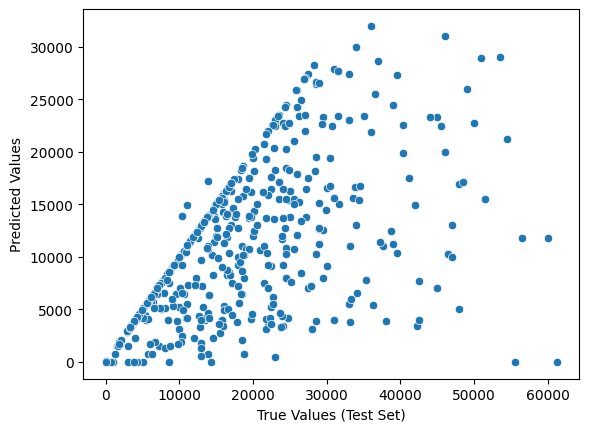

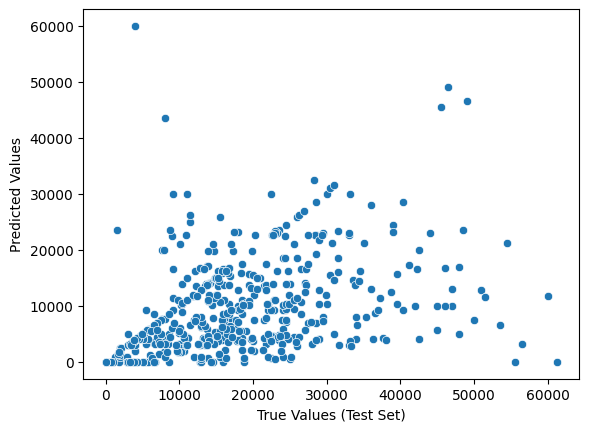

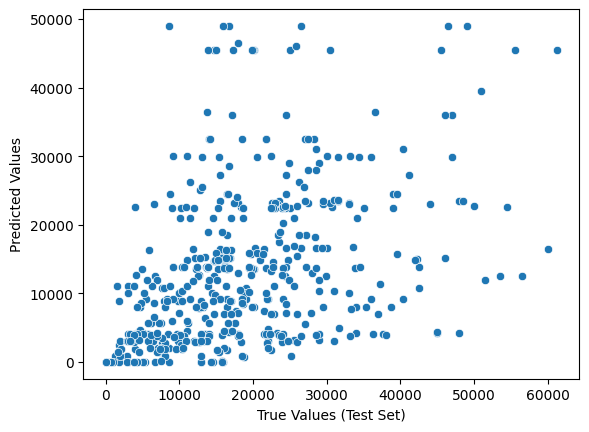

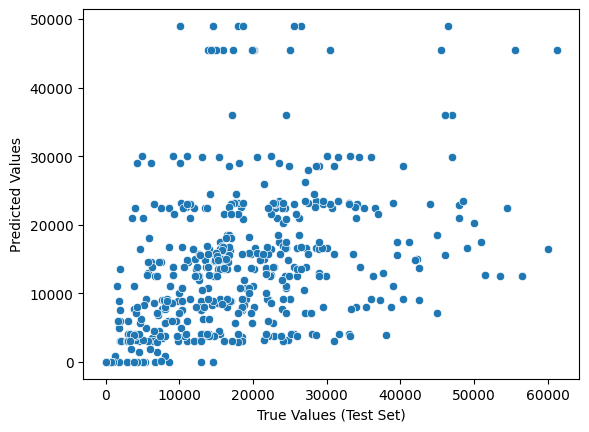

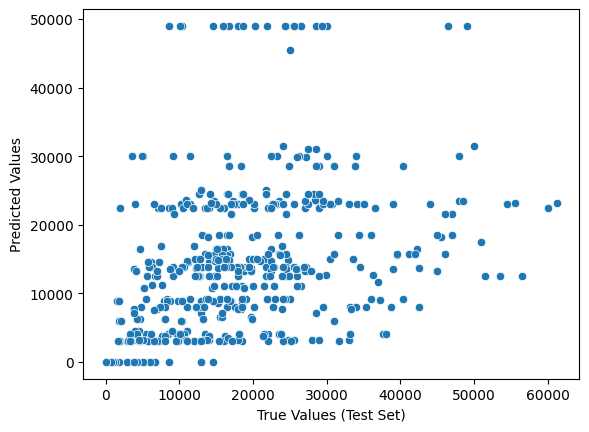

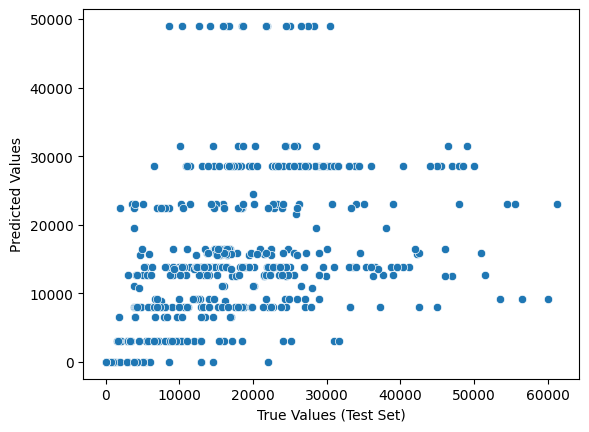

[71983711877, 103710136344, 85309115913, 81207353005, 85633094501, 82564106611]
71983711877


In [ ]:
! git clone https://www.github.com/DS3001/knn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def pn(x):
  print(x,'\n')
  return


df = pd.read_csv('./knn/data/USA_cars_datasets.csv')
vars = ['price', 'year', 'mileage']
df = df[vars]
print(df.head()) #look at head
print(df.shape) #look at dimensions
print(df.columns.tolist()) #summarize variables
print(df.dtypes) #summarize variable datatypes
#print(df['price'].unique(),'\n')
#print(df['year'].unique(),'\n')
#print(df['mileage'].unique(),'\n')
#doesn't appear to be any missing data points - although one car did have a price of $0 which is questionable but maybe it was gifted or given away


#Max-min normalization of year and mileage
xvars = ['year', 'mileage']
X = df.loc[:,xvars]
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)


X = X.apply(maxmin) #apply max min to all columns of year
pn(X.head())
pn(X.describe())


y = df['price'] #defining the outcomes


#split the data into 80% training and 20% test
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kNNRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


k_values = [3, 10, 25, 50, 100, 300]
SSE_values = [ ]
for k in k_values:
  model = kNNRegression(n_neighbors=k)
  fitted_model = model.fit(X,y)
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
  SSE_values.append(SSE)
  results = pd.DataFrame({'Test Values': y_test, 'Predicted Values': y_hat})
  sns.scatterplot(data=results, x='Test Values', y='Predicted Values')
  plt.xlabel('True Values (Test Set)')
  plt.ylabel('Predicted Values')
  #plt.title(f'Scatterplot for k =' + k)
  plt.show()


print(SSE_values)
print(np.min(SSE_values))


#as k increases the model becomes less sensitive to individual data points, the plots appear to be less correlated, and the SSE increases in this case


# k= 3 appears to be the optimal k-value with the lowest SSE


#As k increases, the plots between predicted and test values appear to have less correlation until there are just lines of points on the graph.
#This increased k represents underfitting where individual data points are not being considered and the model is too general in its predictions.
#A smaller k value will overfit the data in which k will be too sensitive and scatter the data too much.


**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [ ]:
#decided not to do this question because I had an error somewhere but might come back to it at some point (did 3 other instead)

# ! git clone https://www.github.com/DS3001/kmc
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# def pn(x):
#     print(x,'\n')

# adf = pd.read_csv('./knn/data/airbnb_hw.csv')
# var = ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']
# adf = adf[var]
# print(adf.head()) #look at head
# print(adf.shape) #look at dimensions
# print(adf.columns.tolist()) #summarize variables
# print(adf.dtypes) #summarize variable datatypes - want to change some of these


# print(adf['Price'].unique(),'\n') # want to get rid of commas so they can all be int
# adf['Price'] = adf['Price'].str.replace(',', '')
# print(adf['Price'].value_counts(), '\n')
# print('Before coercion: \n', adf['Price'].describe(),'\n') #data type is still object here
# adf['Price'] = pd.to_numeric(adf['Price'], errors='coerce') #coerce data from object to float (numeric) data type
# print('After coercion: \n', adf['Price'].describe(),'\n') #confirm data type is float

# print(adf['Beds'].unique(),'\n')
# cl_Beds = 'Beds'
# adf[cl_Beds +'_nan'] = adf[cl_Beds].isnull() # dummy variable for any missing data points (nan)
# print('Number of Missings: \n', sum(adf[cl_Beds +'_nan']),'\n') #show the number of Missing Data points #85 missing data points

# print(adf['Number Of Reviews'].unique(),'\n')
# cl_reviews = 'Number Of Reviews'
# adf[cl_reviews +'_nan'] = adf[cl_reviews].isnull() # dummy variable for any missing data points (nan)
# print('Number of Missings: \n', sum(adf[cl_reviews +'_nan']),'\n') #show the number of Missing Data points #no missing data points


# print(adf['Review Scores Rating'].unique(),'\n')
# cl_ratings = 'Review Scores Rating'
# adf[cl_ratings +'_nan'] = adf[cl_ratings].isnull() # dummy variable for any missing data points (nan)
# print('Number of Missings: \n', sum(adf[cl_ratings +'_nan']),'\n') #show the number of Missing Data points #8323 missing data points - that is a lot!

# adf_cleaned = adf.dropna() #remove all NANs from dataset
# print(adf_cleaned)

# from sklearn.cluster import KMeans # Import kmc

# X = ['Beds', 'Number Of Reviews', 'Review Scores Rating']

# def maxmin(x): # Max-min scaler function
#     x = (x-min(x))/(max(x)-min(x))
#     return x

# # Preprocess the data:
# X = adf_cleaned.loc[ : , ['Beds','Number Of Reviews', 'Review Scores Rating'] ] # Select data to cluster
# X = X.apply(maxmin) # Normalize the data

# # Create a kmc model:
# model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) #k=6

# # Fit the kmc model:
# model = model.fit(X)

# # Predict values:
# adf_cleaned['x_hat'] = model.predict(X)


# sns.pairplot(adf_cleaned, hue =X, palette='Set1')
# plt.show()


fatal: destination path 'kmc' already exists and is not an empty directory.
  Price  Beds  Number Of Reviews  Review Scores Rating
0   145   1.0                  0                   NaN
1    37   1.0                  1                   NaN
2    28   1.0                  1                   NaN
3   199   3.0                  0                   NaN
4   549   3.0                 39                  96.0
(30478, 4)
['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']
Price                    object
Beds                    float64
Number Of Reviews         int64
Review Scores Rating    float64
dtype: object
['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' 

<ipython-input-60-43d64dc80cd8>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf_cleaned['x_hat'] = model.predict(X)


ValueError: ignored

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

          x1        x2 group
0   0.781279  0.851498     a
1   1.042835  0.931282     a
2   1.144129  0.882494     a
3   0.968445  0.896508     a
4   1.122665  1.013608     a
..       ...       ...   ...
45  5.144996  2.890534     c
46  5.087773  3.014701     c
47  4.839512  2.880229     c
48  5.190288  2.764861     c
49  4.977505  3.022793     c

[150 rows x 3 columns]
          x1        x2 group
0   0.562559  0.702996     a
1   1.085670  0.862563     a
2   1.288259  0.764988     a
3   0.936891  0.793017     a
4   1.245330  1.027216     a
..       ...       ...   ...
45  5.289992  2.781067     c
46  5.175546  3.029402     c
47  4.679024  2.760458     c
48  5.380577  2.529721     c
49  4.955009  3.045586     c

[150 rows x 3 columns]


<Axes: xlabel='x1', ylabel='x2'>

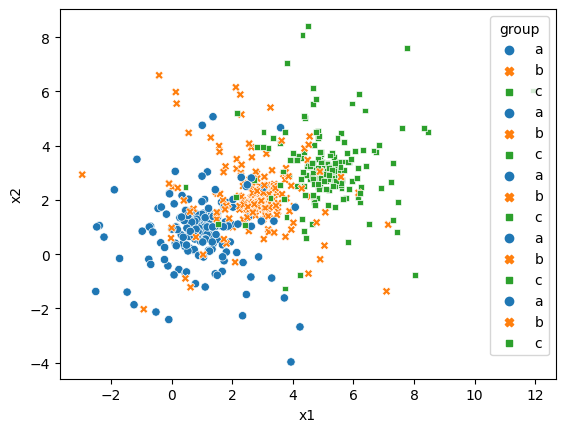

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
  np.random.seed(100) # Set the seed for replicability
  # Generate (x1,x2,g) triples:
  X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
  X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
  X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
  # Concatenate into one data frame
  gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
  gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
  gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
  df = pd.concat([gdf1,gdf2,gdf3],axis=0)
  return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
print(df0_125)
print(df0_25)

#make scatterplot

sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

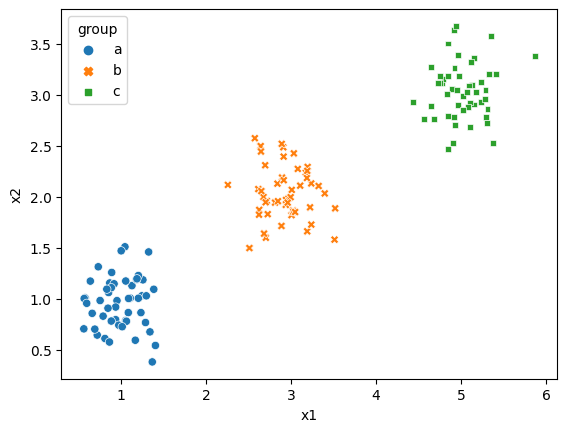

In [ ]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

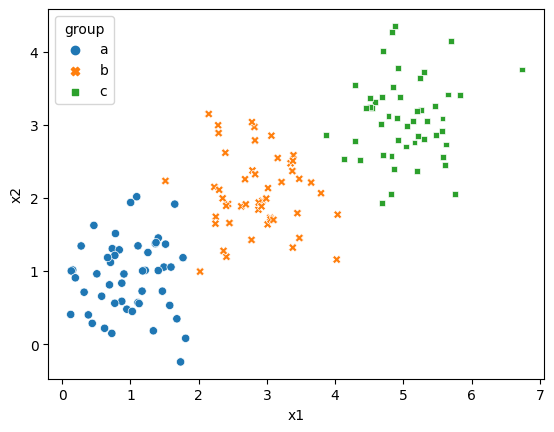

In [ ]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

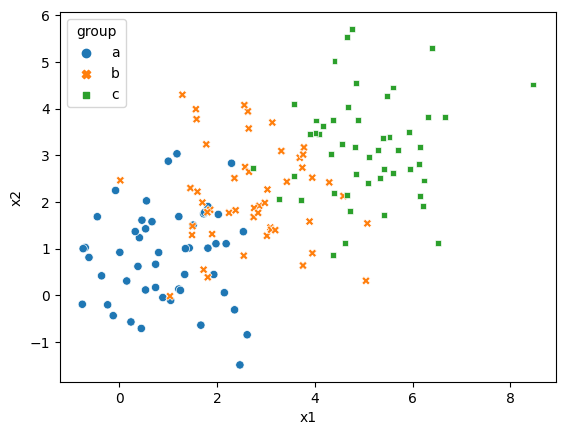

In [ ]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

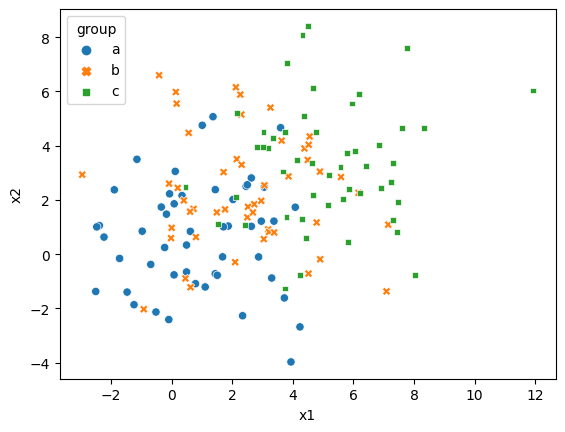

In [ ]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

In [ ]:
#The clusters start to fade and become less distinct from one another as the noise increases to the point where it is impossible to tell the groups apart.

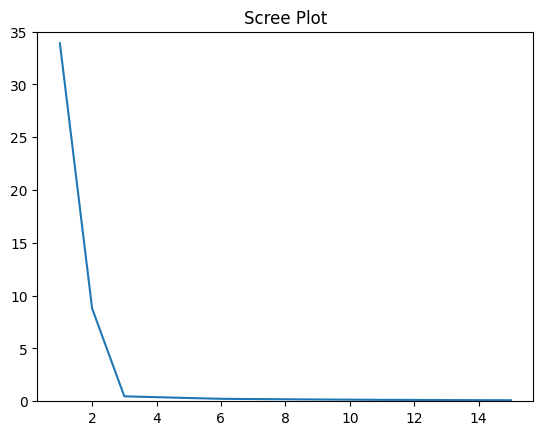

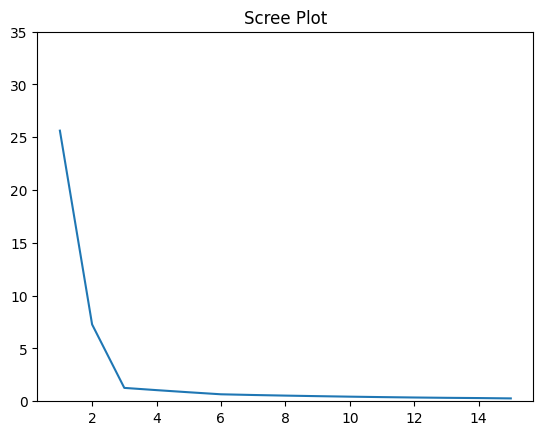

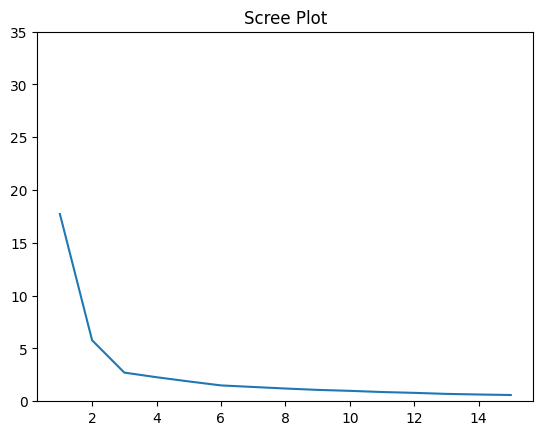

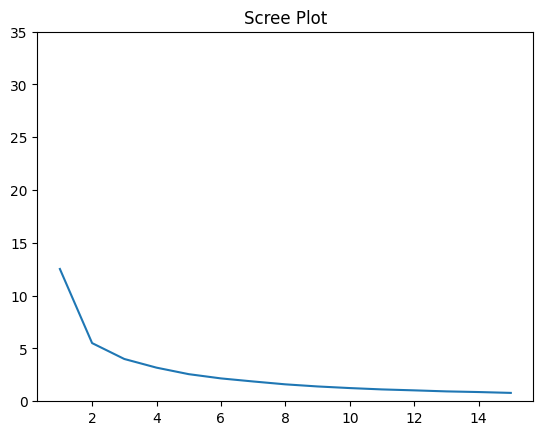

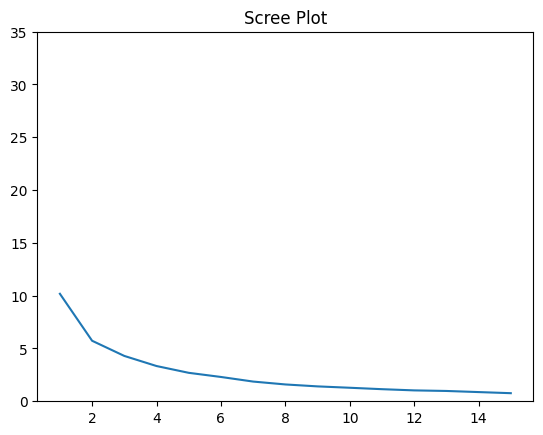

In [ ]:
def maxmin(x): # Max-min scaler function
  x = (x-min(x))/(max(x)-min(x))
  return x

def scree(data): # function given to us in help email
  # Preprocess the data:
  X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
  X = X.apply(maxmin) # Normalize the data
  # Create a scree plot:
  k_bar = 15
  k_grid = np.arange(1,k_bar+1) # The range of k's to consider
  SSE = np.zeros(k_bar) # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) #
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
  axes.set_ylim(0, 35)

scree( data = df0_125) #k = 3 - definitive k at this elbow - lower noise is easy to tell
scree( data = df0_25) # still looks like k=3
scree( data = df0_5) #less distinct but looks like k=3
scree( data = df1_0) #elbow at k=2
scree( data = df2_0) #kind of hard to tell but maybe elbow at k

#Explain the intuition of the elbow, using this numerical simulation as an example.

#There are less obvious/distinct clusters as the noise increases.
#Thus, the elbow will not be clear as the noise increases and the points are more random, because it's not obvious how many clustering groups to pick.


**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?